# PyTorch Notebook (Deep learning fundamentals)

<img src="https://raw.githubusercontent.com/arad1367/UniLi_sources/main/IMG/logo.jpg"
     alt="University of Liechtenstein"
     width="350"
     height="auto">

### About This Tutorial

This tutorial is prepared by **Dr. Pejman Ebrahimi** for the "Deep Learning and Advanced AI Techniques" course at the University of Liechtenstein.

For more resources and notebooks related to this course, please visit Moodle or GitHub repository: [Course Materials](https://github.com/arad1367/University-of-Liechtenstein/tree/main/Deep%20Learning%20and%20Advanced%20AI).

You can reach out to Dr. Pejman Ebrahimi via email: [pejman.ebrahimi@uni.li](mailto:pejman.ebrahimi@uni.li).

### 1. Setting Up the Environment and Loading Data
* First, let's import the necessary libraries. We'll use pandas for data manipulation, numpy for numerical operations, matplotlib for visualization, and PyTorch for building our neural network model.

In [18]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import PyTorch libraries
import torch
from torch import nn
from torch import optim

> Now, let's load our dataset from the provided URL. We'll use pandas to read the CSV file and display the first few rows to understand what our data looks like.

In [20]:
# Load the dataset
drug_data_url = "https://raw.githubusercontent.com/arad1367/WAC_November-2023/refs/heads/main/drug200_missing.csv"
df = pd.read_csv(drug_data_url)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.355,DrugY
1,47.0,M,LOW,HIGH,13.093,drugC
2,47.0,M,LOW,HIGH,10.114,drugC
3,28.0,F,NORMAL,HIGH,7.798,drugX
4,61.0,F,LOW,HIGH,18.043,DrugY


### 2. Data Exploration and Preprocessing
* Let's first identify the categorical columns in our dataset. Categorical columns contain non-numeric values that need to be encoded before we can use them in our model.

In [21]:
# Select categorical columns
objList = df.select_dtypes(include="object").columns
print("\nCategorical Columns:")
print(objList)


Categorical Columns:
Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')


* Label Encoding
> Label Encoding is a technique to convert categorical variables into numerical format. Each unique category value is assigned a unique integer. For example, if we have a "Sex" column with values "M" and "F", they might be encoded as 0 and 1.

In [22]:
# 1. Import library for label encoding
from sklearn.preprocessing import LabelEncoder

# 2. Create an empty dictionary to save encoders
le_dict = {}

# 3. Loop through all object columns and encode
for feat in objList:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat].astype(str))  # Ensure values are string
    le_dict[feat] = le  # Save the encoder for this column

# 4. Check dataframe info after encoding
print("\nDataframe Info After Label Encoding:")
print(df.info())


Dataframe Info After Label Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          198 non-null    float64
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      196 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 9.5 KB
None


* Let's see what the encodings actually represent by printing the mapping for each categorical feature:

In [23]:
# 5. Print mapping for each feature
for feat in objList:
    print(f"\nMapping for '{feat}':")
    le = le_dict[feat]  # Get the LabelEncoder for this feature

    for i, class_label in enumerate(le.classes_):
        print(f"{i} -> {class_label}")


Mapping for 'Sex':
0 -> F
1 -> M

Mapping for 'BP':
0 -> HIGH
1 -> LOW
2 -> NORMAL

Mapping for 'Cholesterol':
0 -> HIGH
1 -> NORMAL
2 -> nan

Mapping for 'Drug':
0 -> DrugY
1 -> drugA
2 -> drugB
3 -> drugC
4 -> drugX


### Handling Missing Values
Now, let's handle any missing values in our dataset. For this simple example, we'll just drop the rows with missing values:

In [25]:
df = df.dropna()

df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,0,0,0,25.355,0
1,47.0,1,1,0,13.093,3
2,47.0,1,1,0,10.114,3
3,28.0,0,2,0,7.798,4
4,61.0,0,1,0,18.043,0


### 3. Preparing Data for PyTorch
Before we can use our data with PyTorch, we need to split it into `features (X)` and the `target variable (y)`, and `then convert them into PyTorch tensors`.
Understanding our target variable
First, let's understand what we're trying to predict. The 'Drug' column contains the drug type that was prescribed to each patient. This is our target variable.

In [28]:
# Check unique values in the Drug column --> multi-class classification task
print("Unique drug types:", df['Drug'].unique())
print("Number of unique drug types:", len(df['Drug'].unique()))

Unique drug types: [0 3 4 2 1]
Number of unique drug types: 5


### Creating features and target variables
Let's separate our features and target variable

In [29]:
# Define features (X) and target (y)
X = df.drop('Drug', axis=1).values  # All columns except 'Drug'
y = df['Drug'].values  # 'Drug' column is our target

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (194, 5)
Target shape: (194,)


### Train-Test Split
Before we build our model, it's important to split our data into training and testing sets. This allows us to train our model on one set of data and evaluate its performance on a separate set.

In [30]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (155, 5)
Training target shape: (155,)
Testing features shape: (39, 5)
Testing target shape: (39,)


### Feature Scaling
Neural networks generally perform better when the input features are on a `similar scale`. Let's `standardize our features`

In [31]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

### Converting to PyTorch Tensors
PyTorch models work with tensors, so we need to convert our NumPy arrays to PyTorch tensors

In [32]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)

X_train_tensor shape: torch.Size([155, 5])
y_train_tensor shape: torch.Size([155])


### 4. Creating PyTorch DataLoader
Understanding DataLoader
In PyTorch, a DataLoader is a utility that helps you efficiently load your data into batches during training. Working with batches has several advantages:

It requires less memory
Training is faster
It can help avoid getting stuck in local minima during optimization

Let's create a DataLoader for our training data

In [33]:
# Import DataLoader and TensorDataset
from torch.utils.data import DataLoader, TensorDataset

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
batch_size = 16  # You can experiment with different batch sizes like 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Let's see what one batch looks like
for batch_features, batch_labels in train_loader:
    print("Batch features shape:", batch_features.shape)
    print("Batch labels shape:", batch_labels.shape)
    break  # Just print the first batch and stop

Batch features shape: torch.Size([16, 5])
Batch labels shape: torch.Size([16])


### 5. Building the Neural Network Model
Understanding Neural Networks
* A neural network is composed of layers of neurons. In our case, we'll build a simple feedforward neural network (also called a Multi-Layer Perceptron or MLP) with:

An input layer (size equal to our feature count)
One or more hidden layers
An output layer (size equal to the number of drug classes)

Let's create our model

In [34]:
# Get input and output dimensions
input_dim = X_train.shape[1]  # Number of features
output_dim = len(df['Drug'].unique())  # Number of drug classes

class DrugClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DrugClassifier, self).__init__()

        # First hidden layer
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()

        # Second hidden layer
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()

        # Output layer
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Pass input through first hidden layer
        x = self.layer1(x)
        x = self.relu1(x)

        # Pass through second hidden layer
        x = self.layer2(x)
        x = self.relu2(x)

        # Output layer (no activation, as we'll use CrossEntropyLoss)
        x = self.output(x)

        return x

# Create the model
hidden_dim = 16  # Size of hidden layers
model = DrugClassifier(input_dim, hidden_dim, output_dim)

# Print the model architecture
print(model)

DrugClassifier(
  (layer1): Linear(in_features=5, out_features=16, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=16, out_features=5, bias=True)
)


### 6. Defining Loss Function and Optimizer

Understanding Loss Functions
A loss function measures how well our model is performing. For classification problems, `Cross Entropy Loss is commonly` used. It measures the difference between the predicted probability distribution and the actual distribution.

Understanding Optimizers
An optimizer adjusts the model's parameters to minimize the loss function. `Stochastic Gradient Descent (SGD)` and Adam are popular choices.

In [35]:
# Define loss function
# For multi-class classification, we use CrossEntropyLoss
# Note: In PyTorch, nn.CrossEntropyLoss() combines:
# 1. A log softmax operation
# 2. A negative log-likelihood loss (NLLLoss)
# This is equivalent to what's known as "categorical cross-entropy" in other frameworks
criterion = nn.CrossEntropyLoss()

# Define optimizer
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### 7. Training the Model
Now we'll train our model using the training data. Training involves:

- `Forward pass`: Making predictions with the current model
- `Calculating loss`: Comparing predictions to actual values
- `Backward pass`: Computing gradients
- `Optimization step`: Updating model parameters

In [36]:
# Set number of epochs
num_epochs = 50

# Lists to store metrics
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate epoch statistics
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Print epoch statistics
    if (epoch + 1) % 5 == 0:  # Print every 5 epochs
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

print('Training complete!')

Epoch 5/50, Loss: 0.5398, Accuracy: 0.7355
Epoch 10/50, Loss: 0.1465, Accuracy: 0.9677
Epoch 15/50, Loss: 0.0497, Accuracy: 0.9935
Epoch 20/50, Loss: 0.0256, Accuracy: 1.0000
Epoch 25/50, Loss: 0.0206, Accuracy: 0.9935
Epoch 30/50, Loss: 0.0108, Accuracy: 1.0000
Epoch 35/50, Loss: 0.0133, Accuracy: 0.9935
Epoch 40/50, Loss: 0.0052, Accuracy: 1.0000
Epoch 45/50, Loss: 0.0095, Accuracy: 0.9935
Epoch 50/50, Loss: 0.0037, Accuracy: 1.0000
Training complete!


### 8. Evaluating the Model
After training, we need to evaluate our model on the test set to see how well it generalizes to new data.

In [37]:
# Set model to evaluation mode
model.eval()

# Variables to track performance
test_loss = 0.0
correct = 0
total = 0

# No gradient calculation needed for evaluation
"""
When you're training a neural network, you need to calculate gradients so the model can learn and improve —
this is done through backpropagation.

But when you're just evaluating the model (like testing how well it performs on new data),
you’re not trying to improve it — you just want to see the results. So, you don’t need to calculate gradients,
which saves time and memory.

In short:
Training = gradients needed (to learn)
Evaluation = no gradients needed (just to check results)
"""
with torch.no_grad():
    for inputs, labels in test_loader:
        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Statistics
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate overall statistics
test_loss = test_loss / len(test_dataset)
test_acc = correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Test Loss: 0.1289, Test Accuracy: 0.9744


### 9. Visualizing Results
Let's visualize the training process and model performance

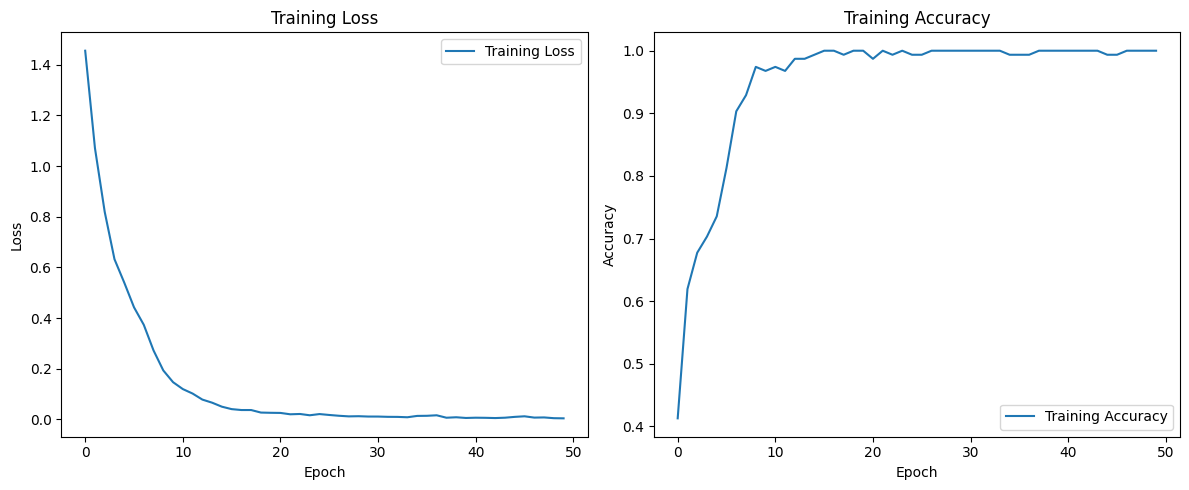

In [38]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Let's also create a confusion matrix to see which drug types our model struggles to classify correctly

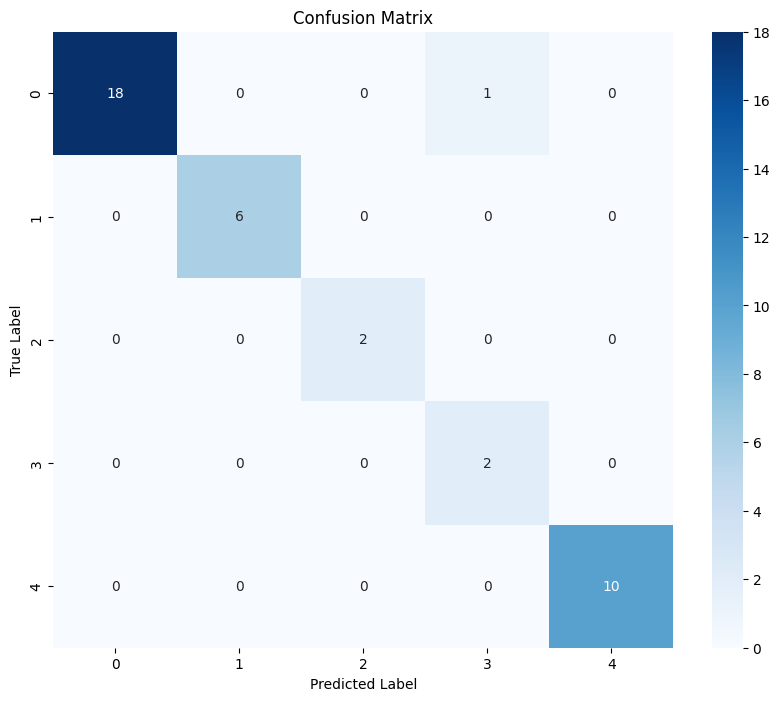

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00        10

    accuracy                           0.97        39
   macro avg       0.93      0.99      0.95        39
weighted avg       0.98      0.97      0.98        39



In [39]:
# Import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test data
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, predicted_classes = torch.max(y_pred, 1)

# Convert tensors to numpy for sklearn functions
y_true = y_test_tensor.numpy()
y_pred = predicted_classes.numpy()

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

### 10. Making Predictions with the Model
Finally, let's see how to use our trained model to make predictions on new data

In [40]:
# Function to preprocess and predict for a new patient
def predict_drug(age, sex, bp, cholesterol, na_to_k):
    # Create a dictionary for the patient data
    patient_data = {
        'Age': [age],
        'Sex': [sex],  # This should be a categorical value that matches our training data
        'BP': [bp],    # This should be a categorical value that matches our training data
        'Cholesterol': [cholesterol],  # This should be a categorical value
        'Na_to_K': [na_to_k]
    }

    # Convert to DataFrame
    patient_df = pd.DataFrame(patient_data)

    # Encode categorical variables using the same encoders we used for training
    for feat in objList:
        if feat in patient_df.columns:
            le = le_dict[feat]
            patient_df[feat] = le.transform(patient_df[feat].astype(str))

    # Convert to numpy array
    patient_array = patient_df.values

    # Scale using the same scaler we used for training
    patient_scaled = scaler.transform(patient_array)

    # Convert to PyTorch tensor
    patient_tensor = torch.FloatTensor(patient_scaled)

    # Set model to evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        outputs = model(patient_tensor)
        _, predicted = torch.max(outputs, 1)

    # Return predicted drug type
    return predicted.item()

# Example: Predict drug for a new patient
# Note: Use categorical values that match our original data
# For example, if 'Sex' was encoded from ['F', 'M'], use one of these values
example_age = 40
example_sex = 'F'  # Use original categorical value
example_bp = 'HIGH'  # Use original categorical value
example_cholesterol = 'HIGH'  # Use original categorical value
example_na_to_k = 15.0

predicted_drug = predict_drug(example_age, example_sex, example_bp, example_cholesterol, example_na_to_k)
print(f'Predicted drug type: {predicted_drug}')
# Great! :))

Predicted drug type: 1


### Conclusion
In this tutorial, we've built a complete machine learning pipeline for drug classification using PyTorch:

- We loaded and preprocessed the data
- We prepared the data for PyTorch by converting it to tensors
- We built a neural network model
- We trained and evaluated the model
- We visualized the results
- We made predictions on new data

There are many ways to improve this model, such as:

* Trying different neural network architectures
* Tuning hyperparameters like learning rate and batch size
* Using regularization techniques like dropout to prevent overfitting
* Trying different optimization algorithms

- Remember that machine learning is an iterative process, and it often takes several attempts to build a good model!

### Task

* Enhance the model evaluation process by introducing a validation set and updating performance visualizations to assess model behavior.

In [43]:
# import HappyCoding
# From Pejman import 15.04.2025